<a href="https://colab.research.google.com/github/ddlandim/monografy-ann-demand-prediction/blob/master/case2__ModelsTests_DriverCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
prefix = 'case2_'
path = 'https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/'
sufix = '?raw=true'

# **BIBLIOTECAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('ggplot')
# PROCESSAMENTO
from sklearn.preprocessing import *
from sklearn.metrics import *
# MODELOS
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import seaborn as sns
import scipy
from scipy import stats

# EXPORTAÇÃO / IMPORTAÇÃO
# Lib para exportar scalers
# https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump, load

# Lib para exportar numpy ou arrays
# https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html
import h5py

# IMPORTAÇÃO DOS DADOS

## Teste de indexação e inclusão de features em um dataframe com as métricas das avaliações.

In [ ]:
df_models_metrics = pd.DataFrame(columns=['MODELO','TOTAL_CONSUMIDAS','TOTAL_PREVISTAS','ERRO_TOTAL_PREVISAO','ERRO_TOTAL_PERC_PREVISAO', 'CORRELACAO', 'p-value', 'slope', 'intercept', 'r2_value', 'std_err','RMSE', 'TOTAL_FALTA', 'TOTAL_DESCARTE', 'ERRO_ABS_MEDIANO' , 'ERRO_ABSOLUTO_PERCENTUAL_MEDIO'])
df_models_metrics

,MODELO,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,p-value,slope,intercept,r2_value,std_err,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO


In [ ]:
df_models_metrics = df_models_metrics.set_index('MODELO')
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,p-value,slope,intercept,r2_value,std_err,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,,,,,


## **case2_** CONJUNTO DE TESTE = 2019-01-01 À 2019-07-31

In [ ]:
df_test = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_df_test.pkl?raw=true")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2019-02-20 to 2019-12-16
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEMESTRE_1                182 non-null    int64  
 1   SEMESTRE_2                182 non-null    int64  
 2   SEGUNDA                   182 non-null    int64  
 3   TERCA                     182 non-null    int64  
 4   QUARTA                    182 non-null    int64  
 5   QUINTA                    182 non-null    int64  
 6   SEXTA                     182 non-null    int64  
 7   DISTANCIA_DIA_ANTERIOR    182 non-null    int64  
 8   DISTANCIA_DIA_POSTERIOR   182 non-null    int64  
 9   PERC_CONCLUSAO_SEM        182 non-null    float64
 10  PERC_CONCLUSAO_MES        182 non-null    float64
 11  PRESSAO_ATMOSFERICA       182 non-null    float64
 12  TEMPERATURA               182 non-null    float64
 13  UMIDADE                   182 non-null    int6

In [ ]:
df_test.head()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,79.020714,62.571854,62.571854,67.317268,50.091915,456.342712,382.416962,283.176819
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,459.848724,347.059082,347.059082,432.812622,508.283020,468.135895,340.036774,151.240524
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,388.522095,383.884796,383.884796,404.804108,329.090057,418.127380,347.315704,204.548737
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,432.235291,294.330261,294.330261,400.811035,304.004944,295.358978,256.305359,247.179459
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,393.512115,329.142548,329.142548,411.179962,418.618652,323.483154,332.013275,299.521332


In [ ]:
df_test.tail()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-10,0,1,0,1,0,0,0,1,1,95.52,32.26,947.8,22.9,81,1.8,75,157,116,291,283,414,61,122,112,170,257,292,19,69,39,132,111,163,379,211,195.135483,191.424683,191.424683,180.425507,176.402603,180.077759,218.612289,243.659103
2019-12-11,0,1,0,0,1,0,0,1,1,96.27,35.48,946.6,22.9,82,1.6,45,75,157,116,291,283,49,61,122,112,170,257,9,19,69,39,132,111,334,144,142.265915,142.691605,142.691605,144.328751,84.207855,116.203125,155.100861,208.853088
2019-12-12,0,1,0,0,0,1,0,1,1,97.01,38.71,945.2,22.2,75,1.0,43,45,75,157,116,291,54,49,61,122,112,170,8,9,19,69,39,132,221,171,126.133835,100.141594,100.141594,127.632721,83.821526,69.310188,95.805367,163.932114
2019-12-13,0,1,0,0,0,0,1,1,3,97.76,41.94,948.2,24.1,74,2.0,7,43,45,75,157,116,14,54,49,61,122,112,0,8,9,19,69,39,145,50,83.581696,79.648407,79.648407,80.023613,66.704697,25.004608,67.734497,155.499100
2019-12-16,0,1,1,0,0,0,0,3,61,100.00,51.61,947.8,28.3,46,5.6,5,7,43,45,75,157,8,14,54,49,61,122,0,0,8,9,19,69,158,89,76.752899,58.757206,58.757206,67.750961,25.787176,9.000000,9.000000,81.170753


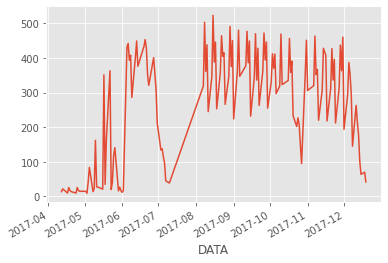

In [ ]:
df_train = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_df_train.pkl?raw=true")
df_train['ENTR_ALMOCO'].plot()

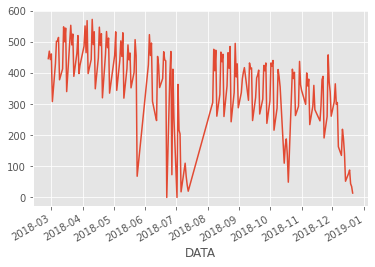

In [ ]:
df_val = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_df_val.pkl?raw=true")
df_val['ENTR_ALMOCO'].plot()

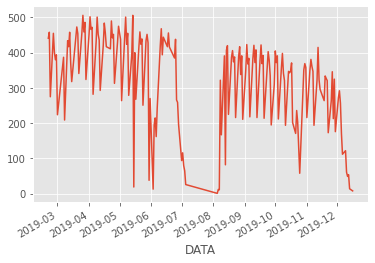

In [ ]:
#CONJUNTO DE TESTE COMPLETO
df_test['ENTR_ALMOCO'].plot()

## NP ARRAYS ESCALADOS E FORMATADOS PARA ENTRADA DOS MODELOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_np_data.h5?raw=true

--2020-10-23 03:16:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_np_data.h5?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_np_data.h5 [following]
--2020-10-23 03:16:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_np_data.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_np_data.h5 [following]
--2020-10-23 03:16:59--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_np_data.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.1

In [ ]:
hf = h5py.File('./case2_np_data.h5?raw=true', 'r')
hf.keys()

<KeysViewHDF5 ['scaled_test_x', 'scaled_test_y', 'scaled_train_x', 'scaled_train_y', 'scaled_val_x', 'scaled_val_y', 'test_x_dense', 'train_x_dense', 'val_x_dense']>

In [ ]:
# Dados Recorrentes(temporais), escalados
scaled_recurrent_train_x = np.array(hf.get('scaled_train_x'))
scaled_recurrent_val_x = np.array(hf.get('scaled_val_x'))
scaled_recurrent_test_x = np.array(hf.get('scaled_test_x'))

# Dados Categóricos (dias da semana e semestre já escalados no df original)
# concatenados com Dados Pontuais (climáticos) escalados
scaled_discrete_train_x = np.array(hf.get('train_x_dense'))
scaled_discrete_val_x = np.array(hf.get('val_x_dense'))
scaled_discrete_test_x = np.array(hf.get('test_x_dense'))

# Valores de supervisão (saída) de cada dataframe, escalados
scaled_train_y = np.array(hf.get('scaled_train_y'))
scaled_val_y = np.array(hf.get('scaled_val_y'))
scaled_test_y = np.array(hf.get('scaled_test_y'))

In [ ]:
hf.close()

## Importando Scalers para transformar a saída em valores reais.

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_scaler_numpont.joblib?raw=true

--2020-10-23 03:16:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_scaler_numpont.joblib?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_scaler_numpont.joblib [following]
--2020-10-23 03:16:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_scaler_numpont.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_scaler_numpont.joblib [following]
--2020-10-23 03:16:59--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_scaler_numpont.joblib
Resolving raw.githubusercontent.com (raw.githubuserc

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_rnn_scalers_arr.joblib?raw=true

--2020-10-23 03:17:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_rnn_scalers_arr.joblib?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_rnn_scalers_arr.joblib [following]
--2020-10-23 03:17:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_rnn_scalers_arr.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_rnn_scalers_arr.joblib [following]
--2020-10-23 03:17:00--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_rnn_scalers_arr.joblib
Resolving raw.githubusercontent.com (raw.github

In [ ]:
num_temporais = 3 #ENTR_ALMOCO, VENDAS_ALMOCO, ENTR_JANTAR
feature_to_predict = 0 #ENTR_ALMOCO
discrete_scaler = MinMaxScaler([0,1])
discrete_scaler = load('./case2_scaler_numpont.joblib?raw=true')

recurrent_scalers = [MinMaxScaler([0,1]) for i in range(num_temporais)]
recurrent_scalers = load('./case2_rnn_scalers_arr.joblib?raw=true')

# **FUNÇÕES DE AVALIAÇÃO DOS MODELOS**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true = np.maximum(y_true, 1e-7)  # Prevent division by zero
  return 100. * np.mean(np.abs((y_true - y_pred) / y_true))

def metricas_predicoes(_df_true, _true_string , _pred_string , datetime_index_begin_string, datetime_index_end_string, _df_models_metrics):
  m_df_models_metrics = pd.DataFrame()
  m_df_models_metrics = _df_models_metrics
  df = pd.DataFrame()
  df = _df_true

  arr_true = df[_true_string][ datetime_index_begin_string : datetime_index_end_string ]
  sum_true = np.sum(arr_true)
  len_true = len(arr_true)

  arr_pred = df[_pred_string][ datetime_index_begin_string : datetime_index_end_string ]
  sum_pred = np.sum(arr_pred)
  len_pred = len(arr_pred)

  diff_pred = sum_pred - sum_true
  perc_diff_pred = (diff_pred / max(1e-7,sum_true)) * 100

  arr_e = arr_true - arr_pred

  print("TOTAL DE REFEIÇÕES CONSUMIDAS = " + str(sum_true) + " : " + str(len_true) + " linhas")
  print("TOTAL DE REFEIÇÕES PROJETADAS = " + str(sum_pred) + " : " + str(len_pred) + " linhas")
  print("ERRO DE PREVISÃO = " + str(diff_pred) + " " + str(perc_diff_pred) + " % do total consumido")

  #correlação e p-value
  m_r, m_p = scipy.stats.pearsonr(arr_true, arr_pred)
  #desvio padrao, r2 e outras estatisticas
  slope, intercept, r_value, p_value, std_err = stats.linregress(arr_true, arr_pred)
  #tranformando r pra r2
  r_value = r_value**2
  print("CORRELAÇÃO (r): " + str(m_r) + " Pi (p) :" + str(p_value) + " R2 :" + str(r_value))
  
  #plotando gráfico scatter
  sns.regplot(x=arr_true,y=arr_pred,data=df)

  rmse = mean_squared_error(arr_true, arr_pred, squared=False)
  print("RMSE = " + str(rmse))

  m_mae = np.median(np.abs(arr_e))
  m_mape = mean_absolute_percentage_error(arr_true,arr_pred)

  subpredictions = sum(i for i in arr_e if i < 0)
  superpredictions = sum(i for i in arr_e if i >= 0)

  print("ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = " + str(subpredictions))
  print("ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = " + str(superpredictions))
  print("ERRO ABSOLUTO MEDIANO = " + str(m_mae))
  print("ERRO ABSOLUTO PERCENTUAL MEDIO = " + str(m_mape)+"%")
  plt.figure(figsize=(30,10))
  
  
  df[_true_string][ datetime_index_begin_string : datetime_index_end_string ].plot( linewidth=1.5, color='red', label = _true_string)
  df[_pred_string][ datetime_index_begin_string : datetime_index_end_string ].plot( linewidth=2.5, color='blue', label = _pred_string)
  plt.legend(fontsize=30)
  plt.ylabel('REFEIÇÕES', fontsize=30)
  plt.xticks(fontsize=30)
  plt.yticks(fontsize=30)
  plt.show()

  m_name = _pred_string + "_" + datetime_index_begin_string + ":" + datetime_index_end_string
  new_row = pd.Series(data={ 'TOTAL_CONSUMIDAS':sum_true, 
          'TOTAL_PREVISTAS':sum_pred, 
          'ERRO_TOTAL_PREVISAO':diff_pred,
          'ERRO_TOTAL_PERC_PREVISAO':perc_diff_pred,
          'CORRELACAO':m_r,'p-value':p_value, 'slope':slope, 'intercept':intercept, 'r2_value':r_value, 'std_err' : std_err,
          'RMSE':rmse, 
          'TOTAL_FALTA':subpredictions, 
          'TOTAL_DESCARTE':superpredictions, 
          'ERRO_ABS_MEDIANO':m_mae, 
          'ERRO_ABSOLUTO_PERCENTUAL_MEDIO':m_mape}, 
          name = m_name)
  m_df_models_metrics = m_df_models_metrics.append(new_row, ignore_index=False)
  return m_df_models_metrics

# **PREVISÕES**

## IMPORTAÇÃO DOS MODELOS ENDÓGENOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_MLP_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_1_NEW_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_2_validated.h5?raw=true

--2020-10-23 03:17:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_MLP_ENDO_1_validated.h5?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_MLP_ENDO_1_validated.h5 [following]
--2020-10-23 03:17:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_MLP_ENDO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_MLP_ENDO_1_validated.h5 [following]
--2020-10-23 03:17:00--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_MLP_ENDO_1_validated.h5
Resolving raw.githubusercontent.com (raw.g

case2_MLP_ENDO_2_validated.h5

case2_RNN_ENDO_2_validated.h5

case2_RNN_ENDO_2_NEW_validated.h5

case2_RNN_ENDO_2_validated.h5

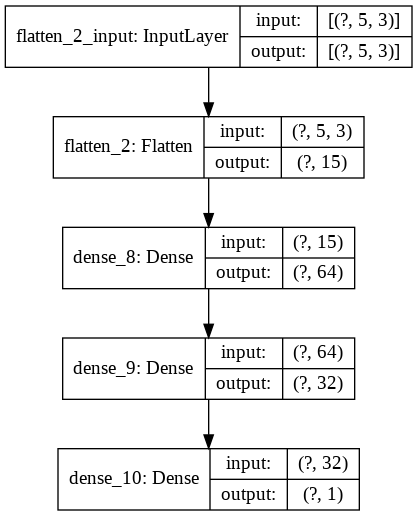

In [ ]:
MLP_ENDO_1 = keras.models.Sequential()
MLP_ENDO_1 = keras.models.load_model('/content/case2_MLP_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

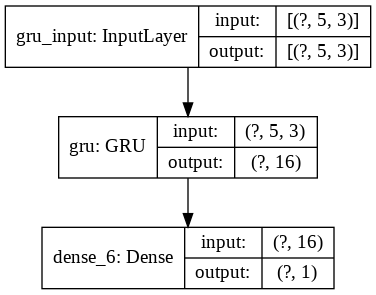

In [ ]:
RNN_ENDO_1 = keras.models.Sequential()
RNN_ENDO_1 = keras.models.load_model('/content/case2_RNN_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

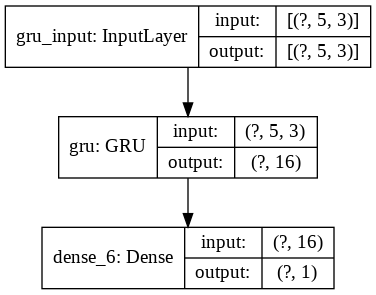

In [ ]:
RNN_ENDO_1_NEW = keras.models.Sequential()
RNN_ENDO_1_NEW = keras.models.load_model('/content/case2_RNN_ENDO_1_NEW_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

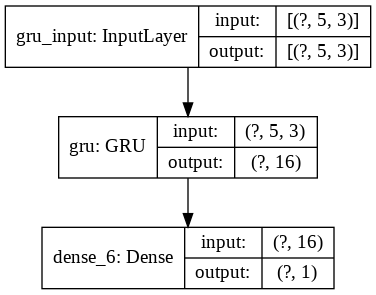

In [ ]:
RNN_ENDO_2 = keras.models.Sequential()
RNN_ENDO_2 = keras.models.load_model('/content/case2_RNN_ENDO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

### TESTES

#### RNN_ENDO_1

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 60412.062 : 182 linhas
ERRO DE PREVISÃO = 1759.0625 2.999100642763371 % do total consumido
CORRELAÇÃO (r): 0.6351548903938133 Pi (p) :5.990026884853865e-22 R2 :0.40342173479117593
RMSE = 101.18177232241452
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -7708.834205627441
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5949.769081115723
ERRO ABSOLUTO MEDIANO = 58.424896240234375
ERRO ABSOLUTO PERCENTUAL MEDIO = 107.879362802119%


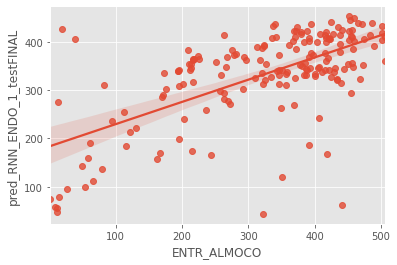

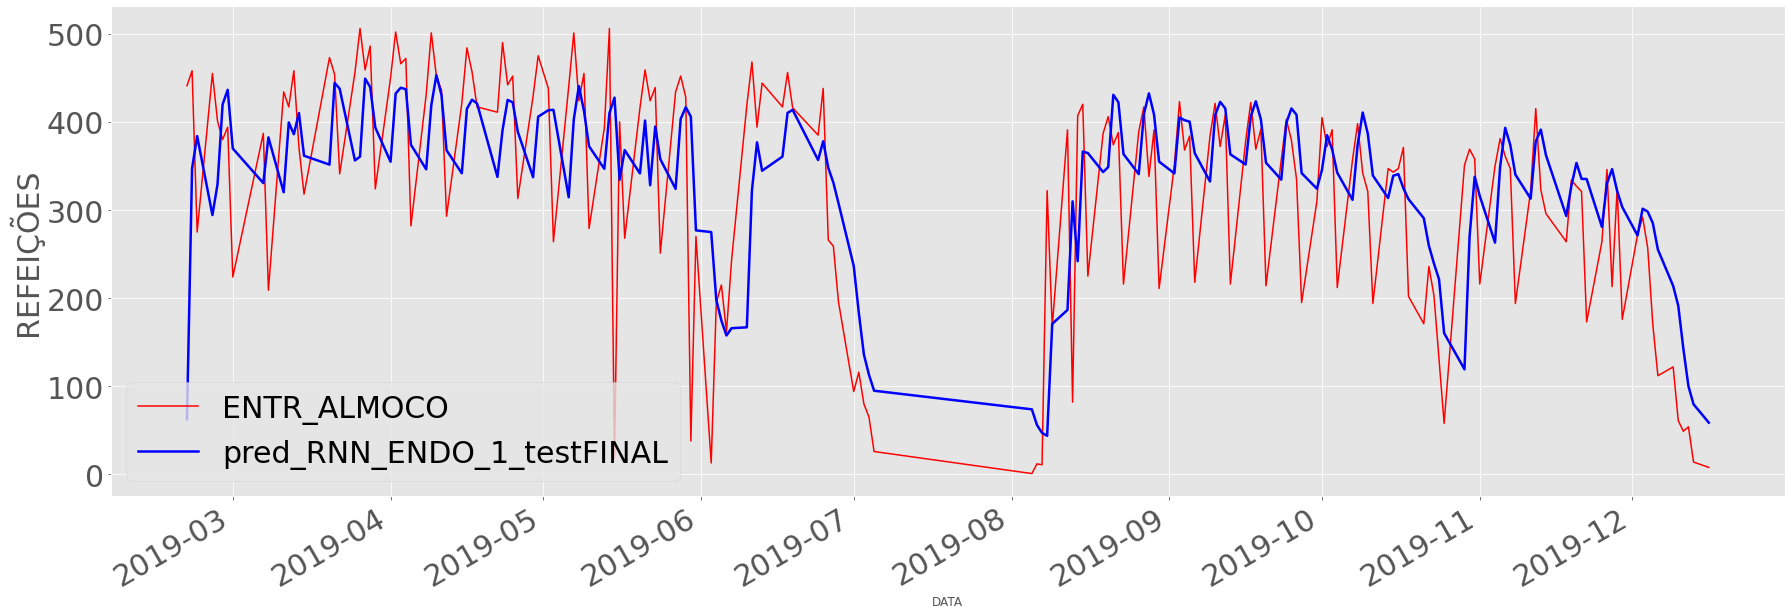

In [ ]:
#RNN_ENDO_1
model_name = 'RNN_ENDO_1'
model = RNN_ENDO_1
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

#def metricas_predicoes(_df_true, _true_string , _pred_string , datetime_index_begin_string, datetime_index_end_string, _df_models_metrics):
_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_ENDO_1_NEW

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 63004.64 : 182 linhas
ERRO DE PREVISÃO = 4351.640625 7.41929760626055 % do total consumido
CORRELAÇÃO (r): 0.6377489726275397 Pi (p) :3.6204535196754704e-22 R2 :0.40672375208748157
RMSE = 106.50977502738827
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -8836.250429153442
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 4484.609394073486
ERRO ABSOLUTO MEDIANO = 50.561546325683594
ERRO ABSOLUTO PERCENTUAL MEDIO = 106.17377043426286%


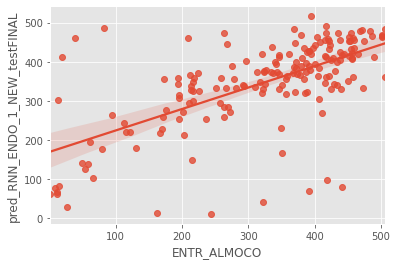

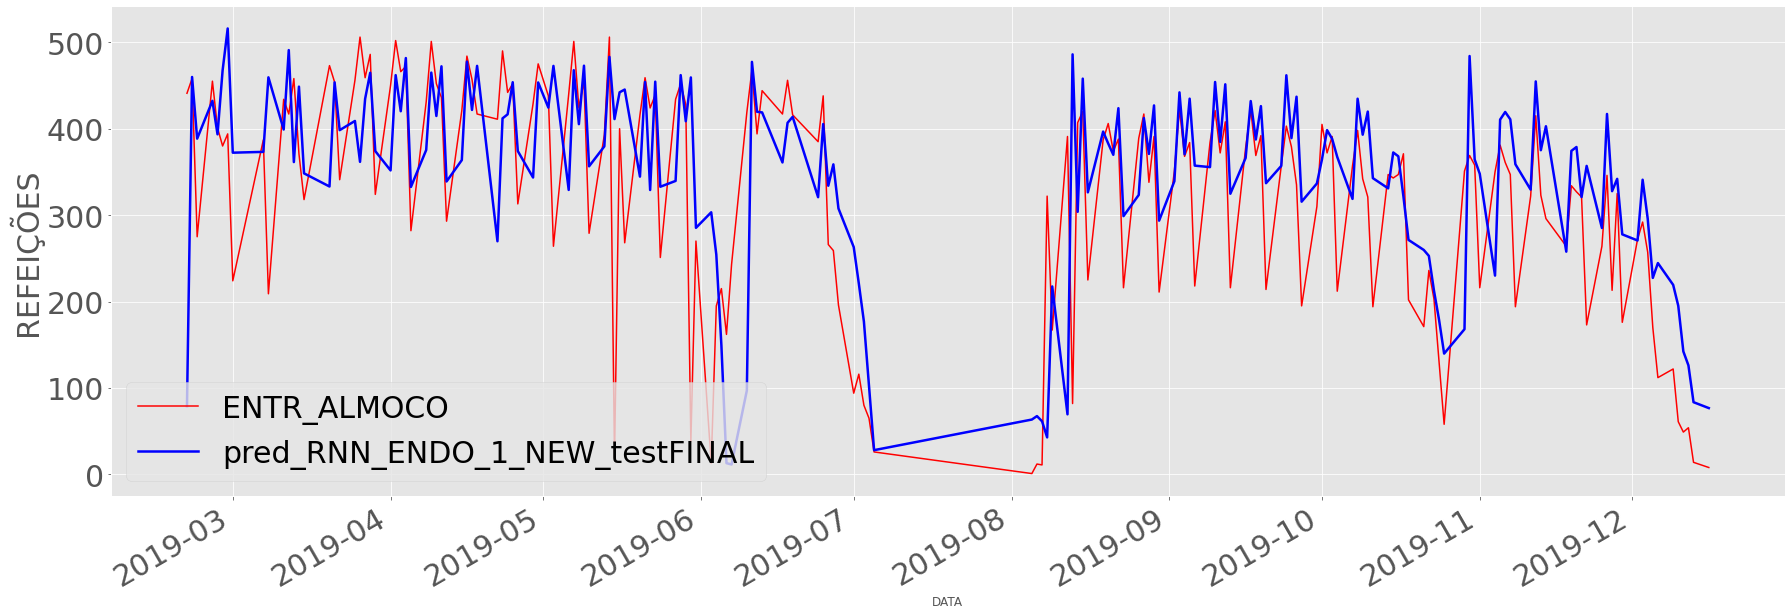

In [ ]:
#RNN_ENDO_1_NEW
model_name = 'RNN_ENDO_1_NEW'
model = RNN_ENDO_1_NEW
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_ENDO_2

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 61855.14 : 182 linhas
ERRO DE PREVISÃO = 3202.140625 5.459466054592263 % do total consumido
CORRELAÇÃO (r): 0.6271911123524763 Pi (p) :2.7285294600346932e-21 R2 :0.3933686914139361
RMSE = 105.32840580346473
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -8335.338161468506
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5133.199876785278
ERRO ABSOLUTO MEDIANO = 55.77995300292969
ERRO ABSOLUTO PERCENTUAL MEDIO = 101.28461523309866%


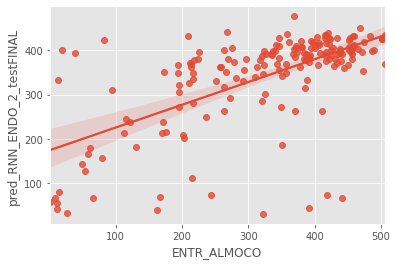

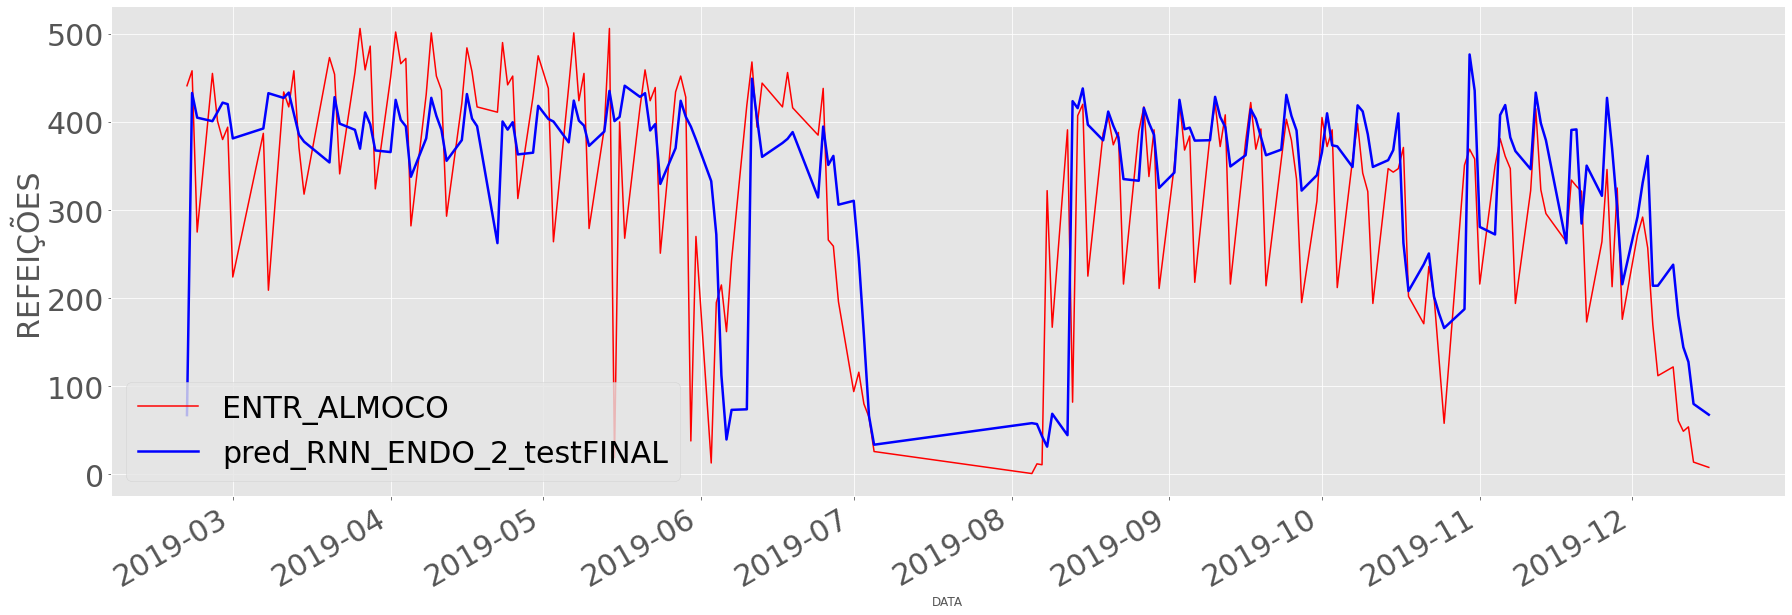

In [ ]:
#RNN_ENDO_2
model_name = 'RNN_ENDO_2'
model = RNN_ENDO_2
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### MLP_ENDO_1

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 60037.895 : 182 linhas
ERRO DE PREVISÃO = 1384.89453125 2.361165722554686 % do total consumido
CORRELAÇÃO (r): 0.6599238349996192 Pi (p) :3.9898660661136114e-24 R2 :0.43549946800060396
RMSE = 101.15156037077867
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -7096.577299118042
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5711.684642791748
ERRO ABSOLUTO MEDIANO = 53.880401611328125
ERRO ABSOLUTO PERCENTUAL MEDIO = 98.55163890179827%


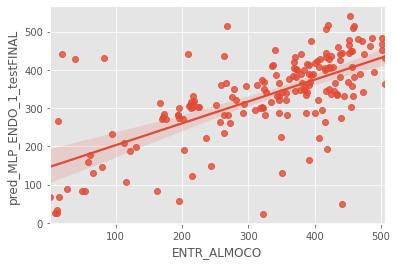

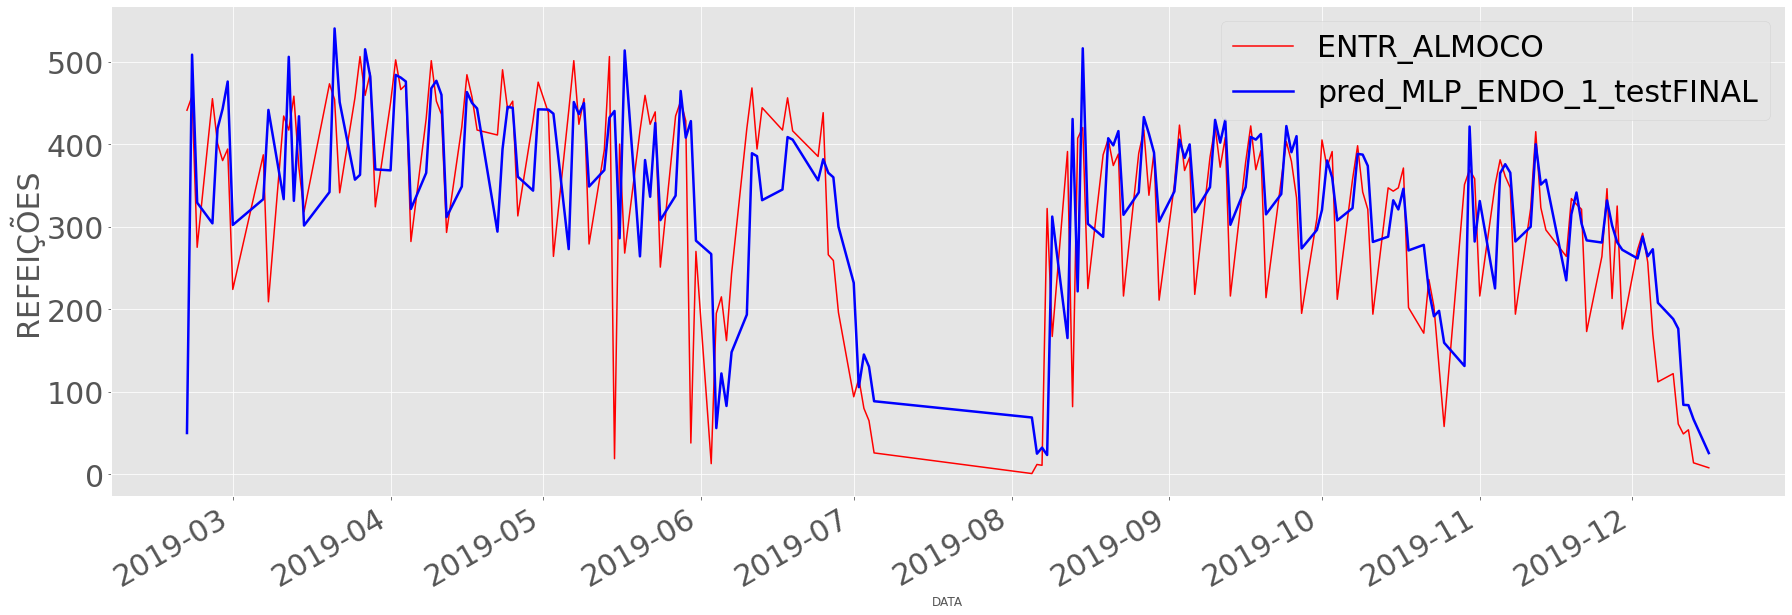

In [ ]:
model_name = 'MLP_ENDO_1'
model = MLP_ENDO_1
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

## IMPORTAÇÃO DOS MODELOS MISTOS (ENDÓGENOS E EXÓGENOS)

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_2_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_3_validated.h5?raw=true

--2020-10-23 03:17:20--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_1_validated.h5?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_RNN_EXO_1_validated.h5 [following]
--2020-10-23 03:17:20--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case2_RNN_EXO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_RNN_EXO_1_validated.h5 [following]
--2020-10-23 03:17:20--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case2_RNN_EXO_1_validated.h5
Resolving raw.githubusercontent.com (raw.github

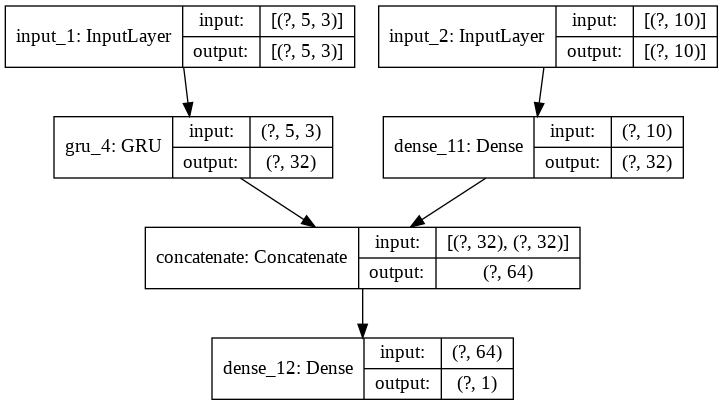

In [ ]:
RNN_EXO_1 = keras.models.Sequential()
RNN_EXO_1 = keras.models.load_model('/content/case2_RNN_EXO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_1, show_shapes=True)

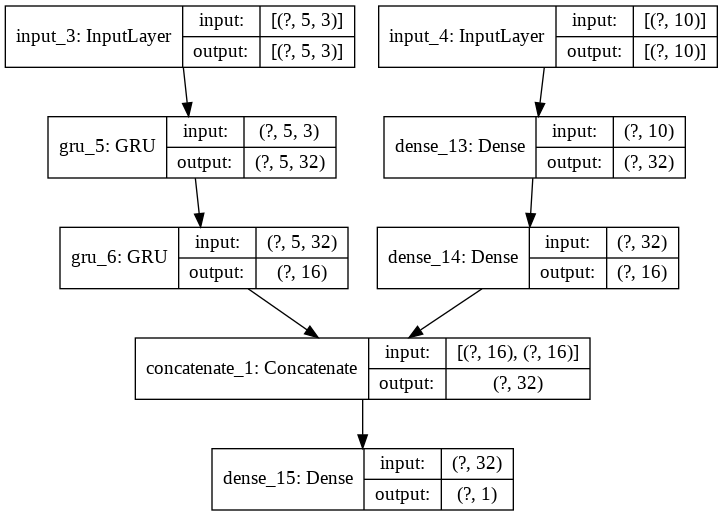

In [ ]:
RNN_EXO_2 = keras.models.Sequential()
RNN_EXO_2 = keras.models.load_model('/content/case2_RNN_EXO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_2, show_shapes=True)

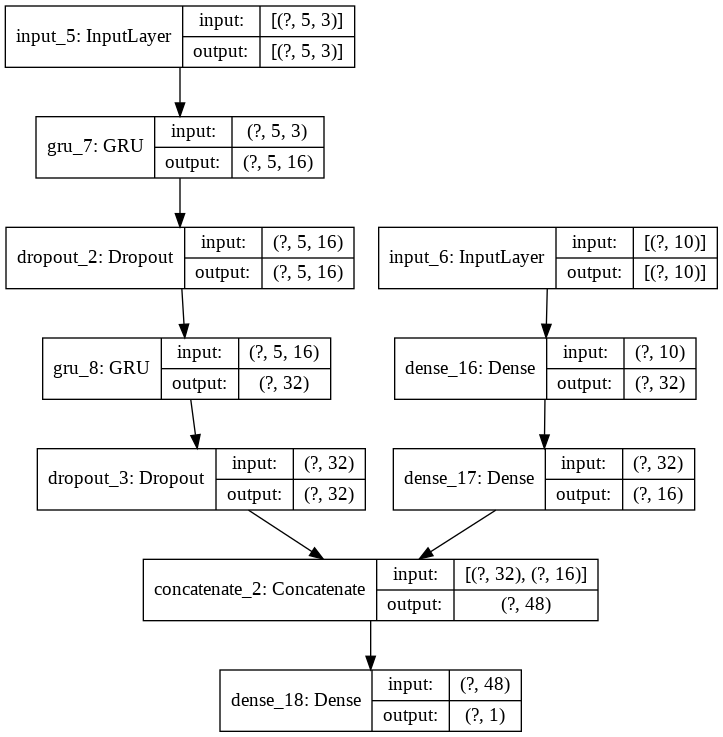

In [ ]:
RNN_EXO_3 = keras.models.Sequential()
RNN_EXO_3 = keras.models.load_model('/content/case2_RNN_EXO_3_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_3, show_shapes=True)

### TESTES

#### RNN_EXO_1

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 62048.047 : 182 linhas
ERRO DE PREVISÃO = 3395.046875 5.788360143556169 % do total consumido
CORRELAÇÃO (r): 0.6714298055859153 Pi (p) :3.298430163867589e-25 R2 :0.45081798382913907
RMSE = 99.36509371895045
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -8163.18741607666
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 4768.1401653289795
ERRO ABSOLUTO MEDIANO = 55.23553466796875
ERRO ABSOLUTO PERCENTUAL MEDIO = 224.9068958473277%


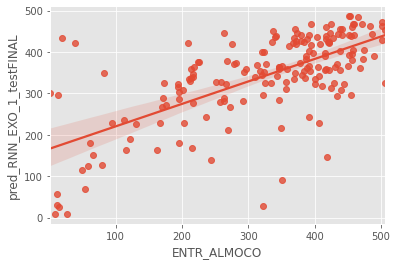

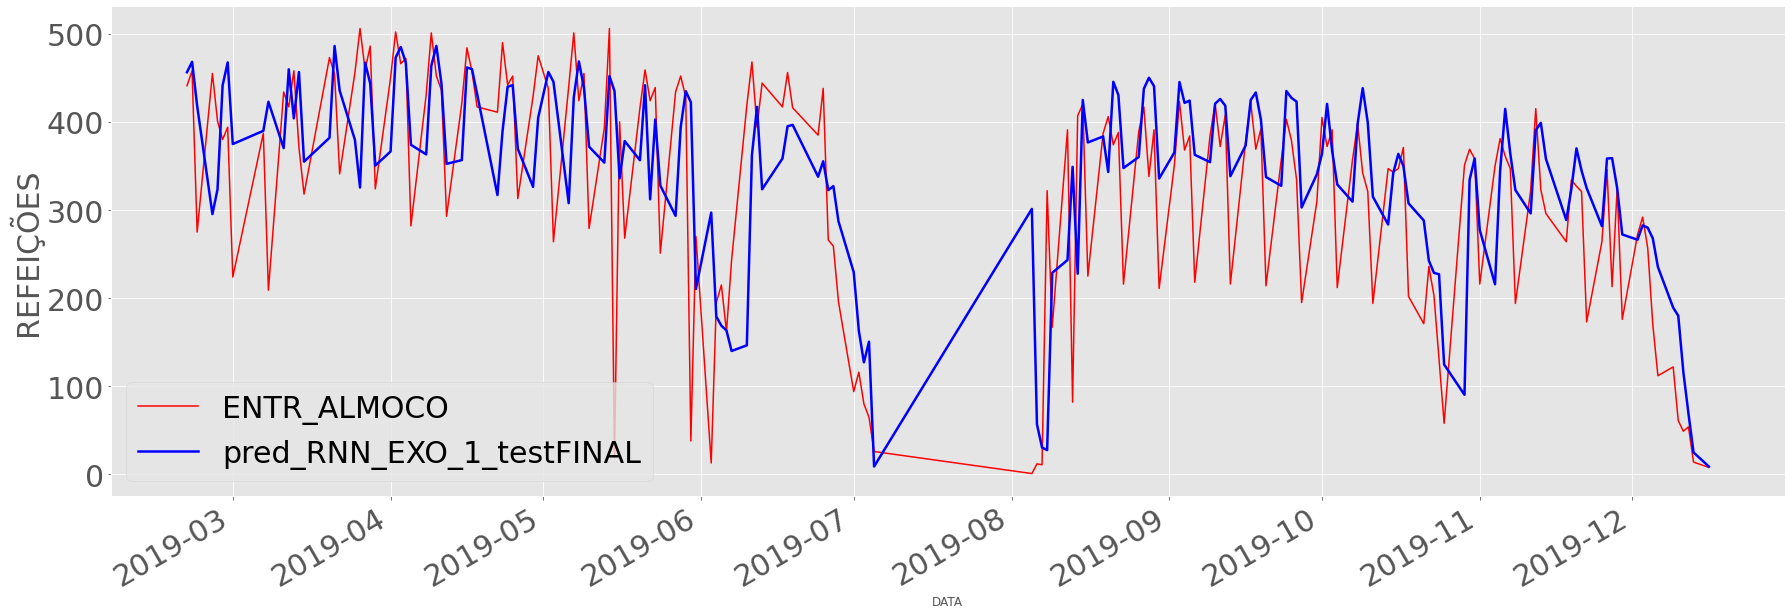

In [ ]:
#RNN_EXO_1
model_name = 'RNN_EXO_1'
model = RNN_EXO_1
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_EXO_2

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 63160.457 : 182 linhas
ERRO DE PREVISÃO = 4507.45703125 7.68495563952398 % do total consumido
CORRELAÇÃO (r): 0.5948978119781834 Pi (p) :8.351710291139265e-19 R2 :0.3539034066964295
RMSE = 107.84935171047965
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -9677.236465454102
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 5169.778854370117
ERRO ABSOLUTO MEDIANO = 64.68639373779297
ERRO ABSOLUTO PERCENTUAL MEDIO = 230.94241029507253%


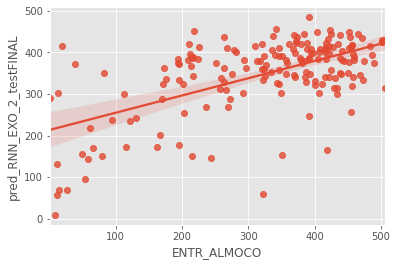

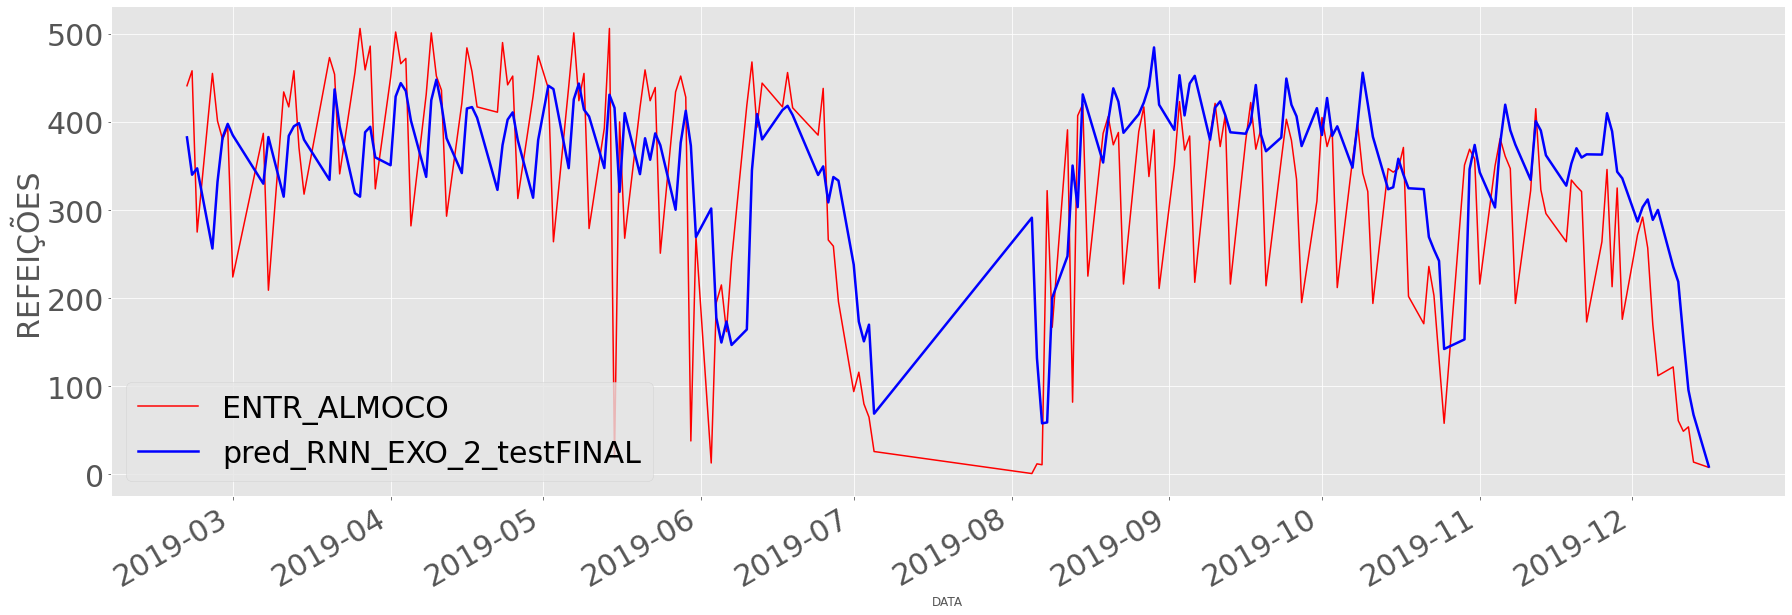

In [ ]:
#RNN_EXO_2
model_name = 'RNN_EXO_2'
model = RNN_EXO_2
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

#### RNN_EXO_3

TOTAL DE REFEIÇÕES CONSUMIDAS = 58653 : 182 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 58348.195 : 182 linhas
ERRO DE PREVISÃO = -304.8046875 -0.519674505140402 % do total consumido
CORRELAÇÃO (r): 0.441937542148059 Pi (p) :4.2231689175514305e-10 R2 :0.19530879115986743
RMSE = 117.03167461256312
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -8608.394020080566
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 8913.193801879883
ERRO ABSOLUTO MEDIANO = 85.18669128417969
ERRO ABSOLUTO PERCENTUAL MEDIO = 236.56705170862548%


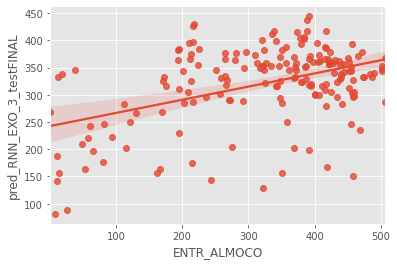

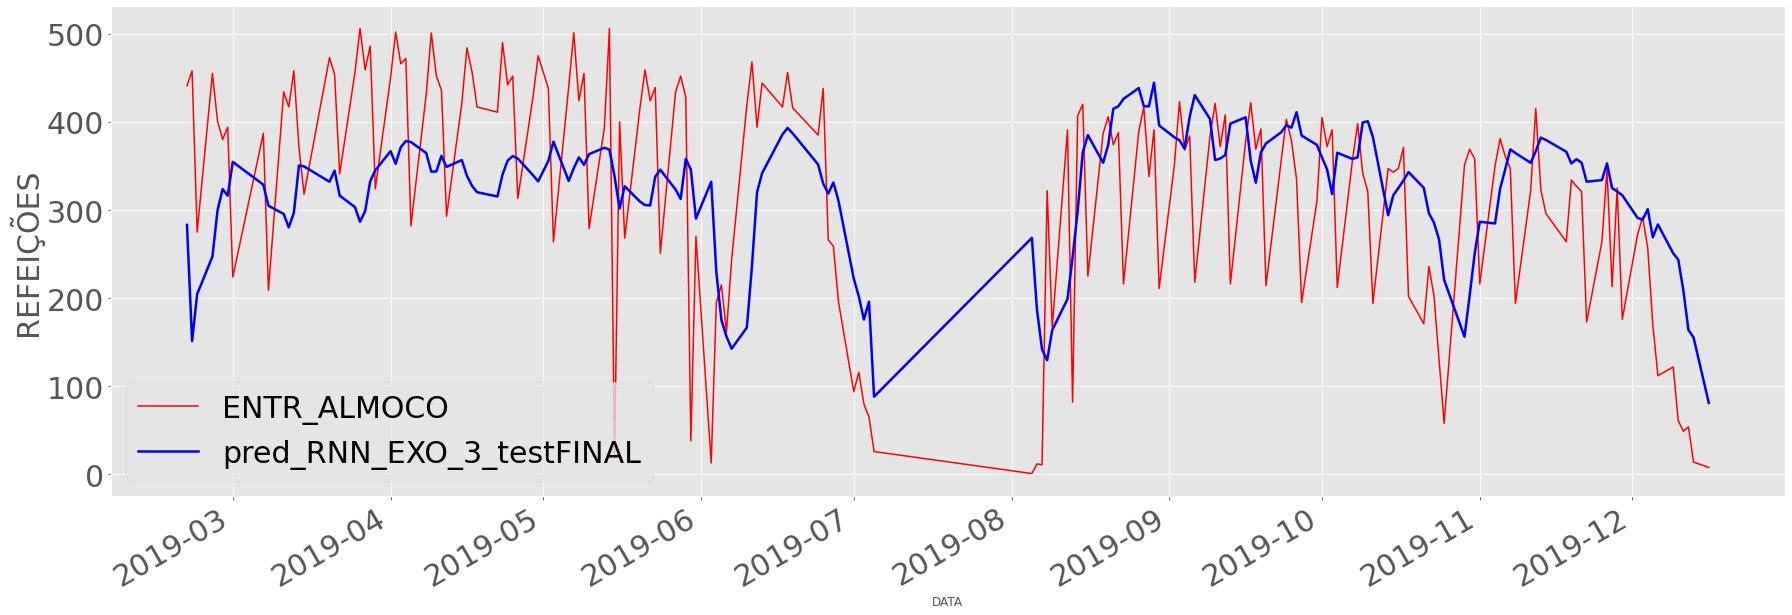

In [ ]:
#RNN_EXO_3
model_name = 'RNN_EXO_3'
model = RNN_EXO_3
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + model_name + '_testFINAL'
df_test[_pred_string] = pred_y

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-12-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

## MELHOR MODELO ENDOGENO NO PRIMEIRO SEMESTRE

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 31677.49 : 88 linhas
ERRO DE PREVISÃO = -284.509765625 -0.8901500707871848 % do total consumido
CORRELAÇÃO (r): 0.5382188589994995 Pi (p) :6.362581385919952e-08 R2 :0.2896795401827231
RMSE = 116.62041932762777
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -3512.3164596557617
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3796.8266105651855
ERRO ABSOLUTO MEDIANO = 65.66421508789062
ERRO ABSOLUTO PERCENTUAL MEDIO = 84.96844953157688%


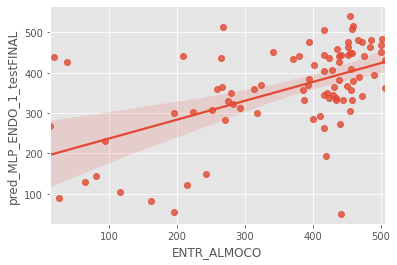

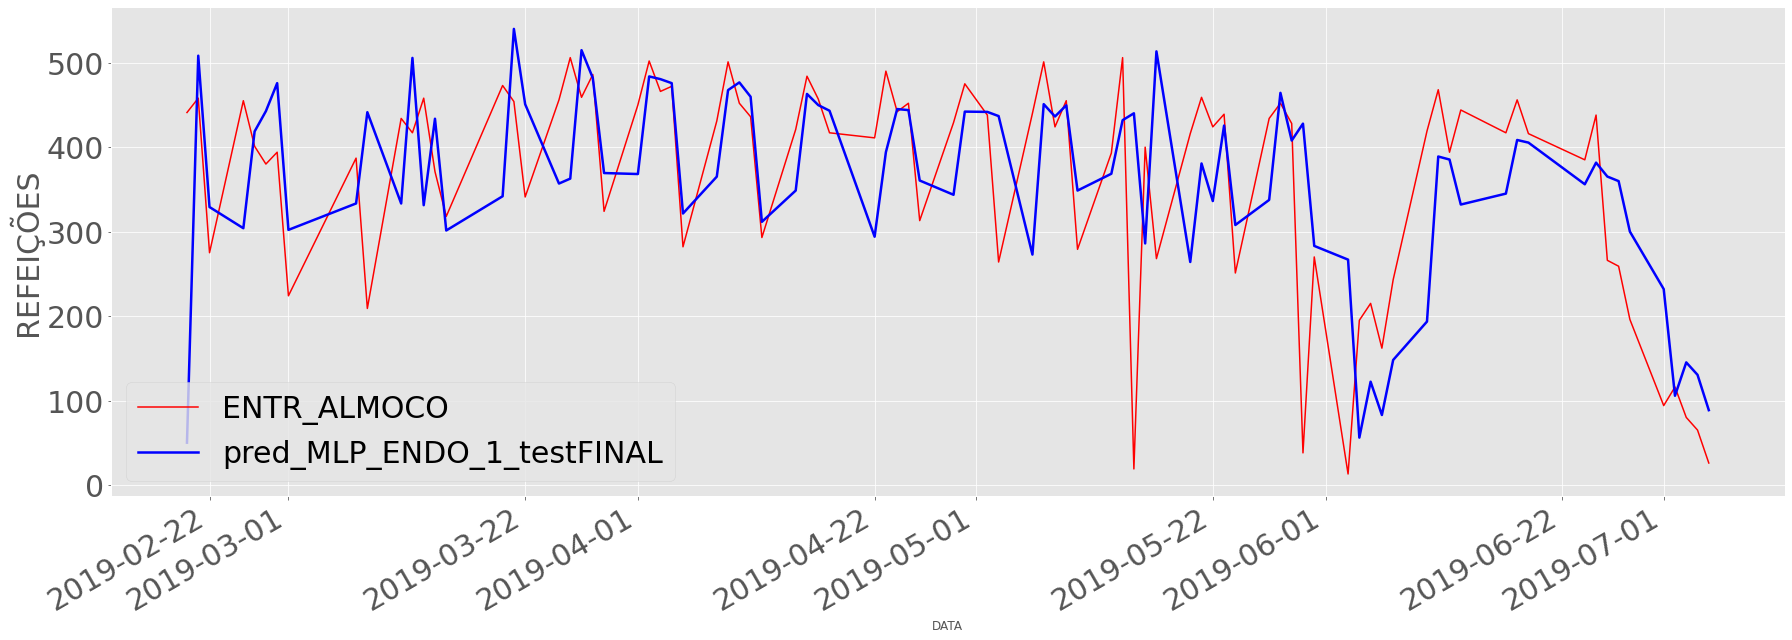

In [ ]:
_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + 'MLP_ENDO_1' + '_testFINAL'

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

## MELHOR MODELO EXÓGENO NO PRIMEIRO SEMESTRE

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 32170.246 : 88 linhas
ERRO DE PREVISÃO = 208.24609375 0.6515427499843564 % do total consumido
CORRELAÇÃO (r): 0.5903766658044398 Pi (p) :1.4143318103073168e-09 R2 :0.34854460752636746
RMSE = 106.2080111071955
ERRO TOTAL DE REFEIÇÕES SUB PROJETADAS = -3454.8696212768555
ERRO TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3246.6229858398438
ERRO ABSOLUTO MEDIANO = 59.541481018066406
ERRO ABSOLUTO PERCENTUAL MEDIO = 83.26712182465872%


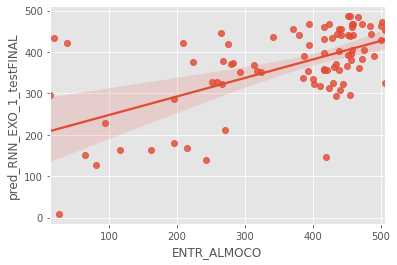

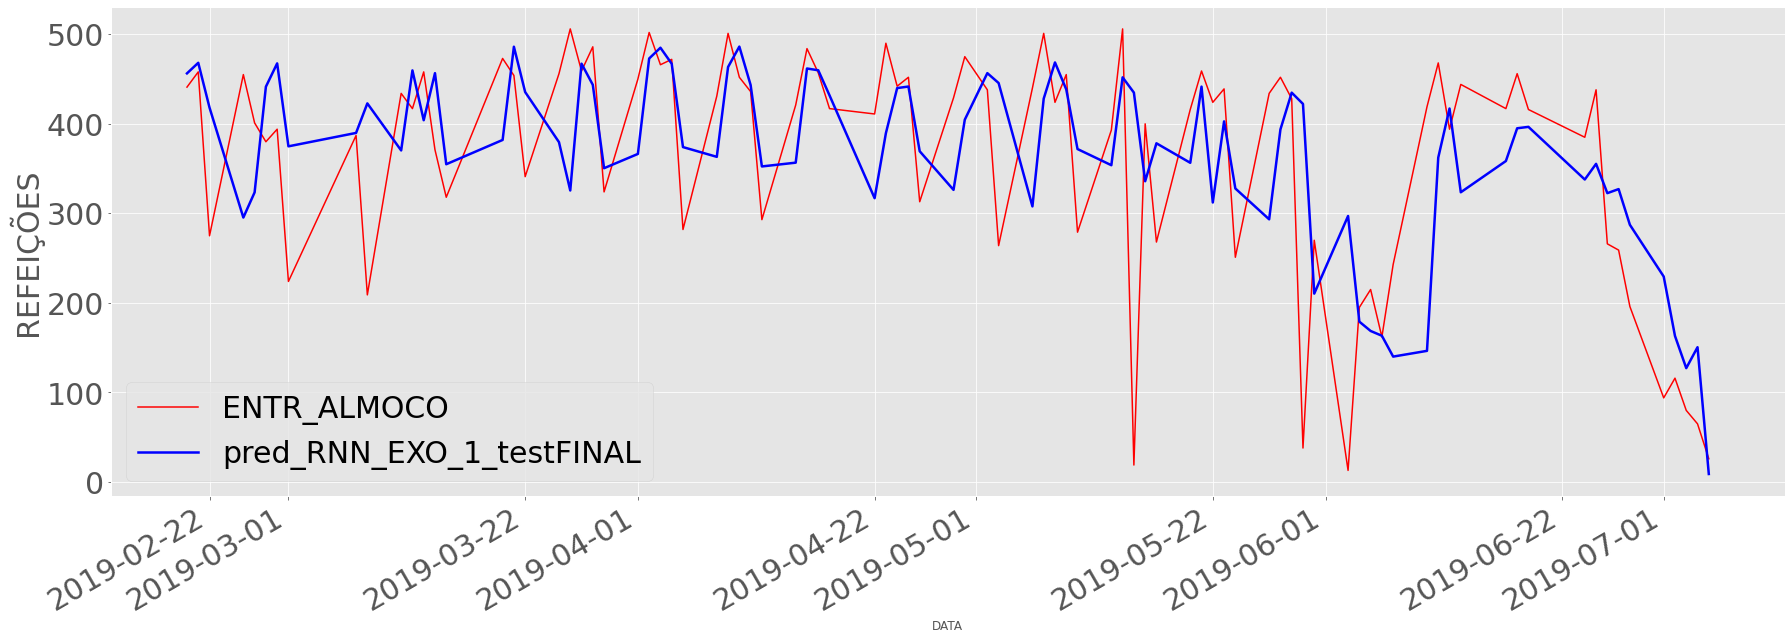

In [ ]:
_true_string = 'ENTR_ALMOCO'
_pred_string = 'pred_' + 'RNN_EXO_1' + '_testFINAL'

datetime_index_begin_string = '2019-01-01'
datetime_index_end_string = '2019-07-31'

df_models_metrics = metricas_predicoes(df_test,_true_string,_pred_string,datetime_index_begin_string,datetime_index_end_string,df_models_metrics)

# EXPORTANDO METRICAS

In [ ]:
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,p-value,slope,intercept,r2_value,std_err,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,,,,,
pred_RNN_ENDO_1_testFINAL_2019-01-01:2019-12-31,58653.0,60412.062500,1759.062500,2.999101,0.635155,5.990027e-22,0.460169,183.636017,0.403422,0.041710,101.181772,-7708.834206,5949.769081,58.424896,107.879363
pred_RNN_ENDO_1_NEW_testFINAL_2019-01-01:2019-12-31,58653.0,63004.640625,4351.640625,7.419298,0.637749,3.620454e-22,0.547504,169.735589,0.406724,0.049287,106.509775,-8836.250429,4484.609394,50.561546,106.173770
pred_RNN_ENDO_2_testFINAL_2019-01-01:2019-12-31,58653.0,61855.140625,3202.140625,5.459466,0.627191,2.728529e-21,0.512505,174.698890,0.393369,0.047438,105.328406,-8335.338161,5133.199877,55.779953,101.284615
pred_MLP_ENDO_1_testFINAL_2019-01-01:2019-12-31,58653.0,60037.894531,1384.894531,2.361166,0.659924,3.989866e-24,0.570441,146.042898,0.435499,0.048408,101.151560,-7096.577299,5711.684643,53.880402,98.551639
pred_RNN_EXO_1_testFINAL_2019-01-01:2019-12-31,58653.0,62048.046875,3395.046875,5.788360,0.671430,3.298430e-25,0.542131,166.211183,0.450818,0.044599,99.365094,-8163.187416,4768.140165,55.235535,224.906896
pred_RNN_EXO_2_testFINAL_2019-01-01:2019-12-31,58653.0,63160.457031,4507.457031,7.684956,0.594898,8.351710e-19,0.414972,213.302792,0.353903,0.041792,107.849352,-9677.236465,5169.778854,64.686394,230.942410
pred_RNN_EXO_3_testFINAL_2019-01-01:2019-12-31,58653.0,58348.195312,-304.804688,-0.519675,0.441938,4.223169e-10,0.242477,242.451488,0.195309,0.036685,117.031675,-8608.394020,8913.193802,85.186691,236.567052
pred_MLP_ENDO_1_testFINAL_2019-01-01:2019-07-31,31962.0,31677.490234,-284.509766,-0.890150,0.538219,6.362581e-08,0.466831,190.416207,0.289680,0.078828,116.620419,-3512.316460,3796.826611,65.664215,84.968450
pred_RNN_EXO_1_testFINAL_2019-01-01:2019-07-31,31962.0,32170.246094,208.246094,0.651543,0.590377,1.414332e-09,0.446848,203.273830,0.348545,0.065875,106.208011,-3454.869621,3246.622986,59.541481,83.267122


In [ ]:
df_models_metrics.to_excel('/content/case2_df_models_metrics.xlsx')

In [ ]:
df_test

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test,pred_RNN_ENDO_1_testFINAL,pred_RNN_ENDO_1_NEW_testFINAL,pred_RNN_ENDO_2_testFINAL,pred_MLP_ENDO_1_testFINAL,pred_RNN_EXO_1_testFINAL,pred_RNN_EXO_2_testFINAL,pred_RNN_EXO_3_testFINAL
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,79.020714,62.571854,62.571854,67.317268,50.091915,456.342712,382.416962,283.176819,62.571854,79.020714,67.317268,50.091915,456.342712,382.416962,283.176819
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,459.848724,347.059082,347.059082,432.812622,508.283020,468.135895,340.036774,151.240524,347.059082,459.848724,432.812622,508.283020,468.135895,340.036774,151.240524
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,388.522095,383.884796,383.884796,404.804108,329.090057,418.127380,347.315704,204.548737,383.884796,388.522095,404.804108,329.090057,418.127380,347.315704,204.548737
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,432.235291,294.330261,294.330261,400.811035,304.004944,295.358978,256.305359,247.179459,294.330261,432.235291,400.811035,304.004944,295.358978,256.305359,247.179459
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,393.512115,329.142548,329.142548,411.179962,418.618652,323.483154,332.013275,299.521332,329.142548,393.512115,411.179962,418.618652,323.483154,332.013275,299.521332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,0,1,0,1,0,0,0,1,1,95.52,32.26,947.8,22.9,81,1.8,75,157,116,291,283,414,61,122,112,170,257,292,19,69,39,132,111,163,379,211,195.135483,191.424683,191.424683,180.425507,176.402603,180.077759,218.612289,243.659103,191.424683,195.135483,180.425507,176.402603,180.077759,218.612289,243.659103
2019-12-11,0,1,0,0,1,0,0,1,1,96.27,35.48,946.6,22.9,82,1.6,45,75,157,116,291,283,49,61,122,112,170,257,9,19,69,39,132,111,334,144,142.265915,142.691605,142.691605,144.328751,84.207855,116.203125,155.100861,208.853088,142.691605,142.265915,144.328751,84.207855,116.203125,155.100861,208.853088
2019-12-12,0,1,0,0,0,1,0,1,1,97.01,38.71,945.2,22.2,75,1.0,43,45,75,157,116,291,54,49,61,122,112,170,8,9,19,69,39,132,221,171,126.133835,100.141594,100.141594,127.632721,83.821526,69.310188,95.805367,163.932114,100.141594,126.133835,127.632721,83.821526,69.310188,95.805367,163.932114


In [ ]:
df_test.to_excel('/content/case2_df_test.xlsx')

# Download xlsx files in /content/ folder and enjoy it =)